## OBJETIVO DO TRABALHO

    Desenvolvimento de uma segmentação de clientes para definir a estratégia de marketing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer

# Análise exploratória dos dados

In [2]:
#Importação dos dados
df0 = pd.read_csv('clientes_agrupados.csv')

In [3]:
#Retornando as primeiras linhas do DataFrame
df0.head()

,cod_cliente,valor_total,numero_visitas,quantidade_produtos,dias_desde_ultima_compra
0,10000,2069,46,214,4
1,10001,9110,200,1111,8
2,10002,76,2,2,370
3,10006,8883,153,1087,350
4,10007,9072,119,1289,2


#### Verificando os tipos

In [4]:
df0.dtypes

cod_cliente                 int64
valor_total                 int64
numero_visitas              int64
quantidade_produtos         int64
dias_desde_ultima_compra    int64
dtype: object

#### Ajustando a coluna cod_cliente para ser não numérica

In [5]:
df0['cod_cliente'] = df0['cod_cliente'].astype('string')

In [6]:
#Verificando se foi alterado
df0.dtypes

cod_cliente                 string
valor_total                  int64
numero_visitas               int64
quantidade_produtos          int64
dias_desde_ultima_compra     int64
dtype: object

#### Verificando o Resumo Estatístico

In [7]:
colunas_numericas = df0.select_dtypes(include=['int64', 'float64'])
colunas_numericas.describe(percentiles=[0.25, 0.5, 0.75])

,valor_total,numero_visitas,quantidade_produtos,dias_desde_ultima_compra
count,53170.000000,53170.000000,53170.000000,53170.000000
mean,2246.389487,30.967068,264.899680,159.235415
std,4146.176503,52.303246,496.771878,270.850289
min,0.000000,1.000000,1.000000,2.000000
25%,182.000000,3.000000,18.000000,7.000000
50%,714.000000,10.000000,75.000000,28.000000
75%,2448.000000,36.000000,280.000000,192.000000
max,111717.000000,1572.000000,10059.000000,1521.000000


#### Porcentagem de valores ausentes

In [8]:
(df0.isna().sum() / len(df0))*100

cod_cliente                 0.0
valor_total                 0.0
numero_visitas              0.0
quantidade_produtos         0.0
dias_desde_ultima_compra    0.0
dtype: float64

# Preparação e limpeza dos dados

## Remoção de Outliers

In [9]:
df1 = df0.copy()

##### Método do std(Desvio Padrão) - Valor Total

In [10]:
dt_mean, dt_std = np.mean(df1['valor_total']), np.std(df1['valor_total'])
cut_off = dt_std * 3
lower, upper = dt_mean - cut_off, dt_mean + cut_off
idx = np.where((df1['valor_total'] < lower) | (df1['valor_total'] > upper))

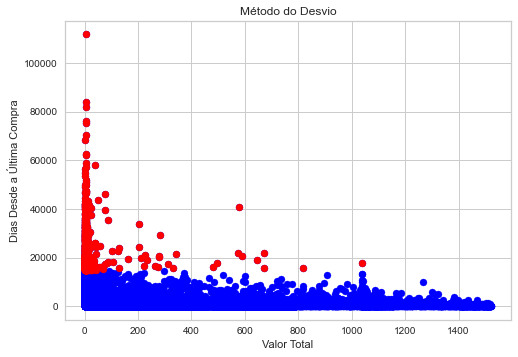

In [11]:
plt.scatter(df1['dias_desde_ultima_compra'],df1['valor_total'], color='blue')

#Marcando os outliers
plt.scatter(df1.loc[idx, 'dias_desde_ultima_compra'], df1.loc[idx, 'valor_total'], color= 'red')

#Títulos e rótulos
plt.title('Método do Desvio')
plt.xlabel('Valor Total')
plt.ylabel('Dias Desde a Última Compra')

#Exibindo o gráfico
plt.show()

#### Novo DataFrame sem os outliers identificados

In [12]:
df2 = df1.loc[idx]

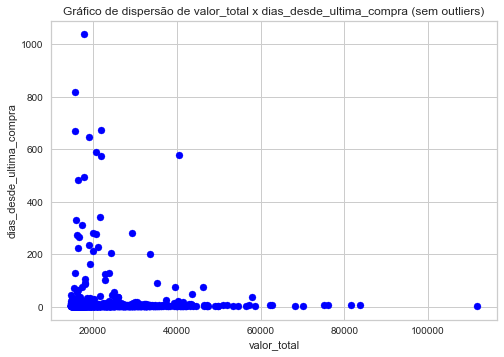

In [13]:
# Criar o gráfico de dispersão para a variável valor_total com os outliers removidos
plt.scatter(df2['valor_total'], df2['dias_desde_ultima_compra'], color='blue')

# Adicionar títulos e rótulos de eixo
plt.title('Gráfico de dispersão de valor_total x dias_desde_ultima_compra (sem outliers)')
plt.xlabel('valor_total')
plt.ylabel('dias_desde_ultima_compra')

# Exibir o gráfico
plt.show()


### Descobrindo o número ideal de cluster

In [14]:
df3 = df2.copy()

In [15]:
#Selecionando as colunas de relevância
X = df3[['valor_total','dias_desde_ultima_compra']]

In [16]:
#Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 0.06236362, -0.19537527],
       [-0.81198336,  0.15077874],
       [-0.34922609, -0.18095218],
       ...,
       [-0.56570428, -0.13768293],
       [-0.6912054 , -0.1665291 ],
       [-0.16772177, -0.18095218]])

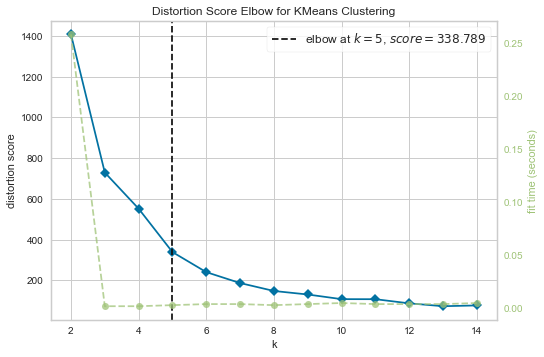

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
#Intânciando o modelo
kmeans = KMeans()

#Criando uma visualiação do cotovelo usando o KElbowVisualizer
visualizador = KElbowVisualizer(kmeans, k=(2,15))
visualizador.fit(X_scaled)

#Mostrando a visualização
visualizador.show()

### Avaliando a qualidade do cluster

In [18]:
df4 = df3.copy()

In [19]:
df4 = df4.reset_index(drop=True)

Índice de silhueta médio: 0.8763062339011181


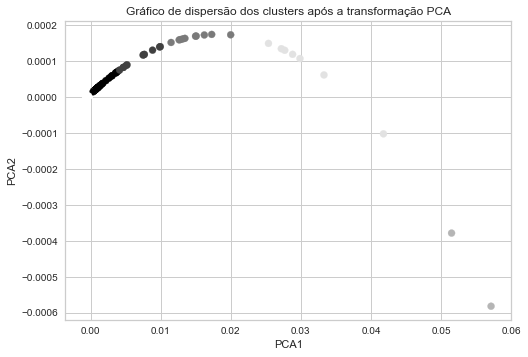

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Normalizar os dados
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)

# Aplicar a transformação PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# Escolher o número de clusters
k = 6

# Realizar o agrupamento com o algoritmo K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_pca)

# Adicionar as etiquetas de cluster ao DataFrame original
df4['cluster'] = kmeans.labels_

# Avaliar a qualidade dos clusters usando o índice de silhueta
silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
print("Índice de silhueta médio:", silhouette_avg)

# Plotar um gráfico de dispersão para visualizar os clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df4['cluster'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Gráfico de dispersão dos clusters após a transformação PCA')
plt.show()


In [21]:
df4

,cod_cliente,valor_total,numero_visitas,quantidade_produtos,dias_desde_ultima_compra,cluster
0,10014,22693,377,2993,2,0
1,10031,14918,162,2004,26,5
2,10068,19033,147,3010,3,0
3,10072,16146,102,2669,4,0
4,10073,18333,116,2291,2,0
...,...,...,...,...,...,...
1136,9860,15696,152,1890,5,0
1137,9867,23075,380,3218,4,0
1138,9887,17108,325,2335,6,0
1139,9971,15992,164,2093,4,0


# Clientes por Cluster

In [22]:
# Imprimir os valores agrupados por cluster
clusters_status = df4.groupby('cluster').agg({
    'valor_total'    : ['count', 'mean', 'std', 'min', 'max'],
    'numero_visitas' : ['count', 'mean', 'std', 'min', 'max'],
    'quantidade_produtos' : ['count', 'mean', 'std', 'min', 'max'],
    'dias_desde_ultima_compra' : ['count', 'mean', 'std', 'min', 'max'] 
})

#Renomear as colunas
clusters_status.columns = ['_'.join(col).strip() for col in clusters_status.columns.values]

clusters_status

,valor_total_count,valor_total_mean,valor_total_std,valor_total_min,valor_total_max,numero_visitas_count,numero_visitas_mean,numero_visitas_std,numero_visitas_min,numero_visitas_max,quantidade_produtos_count,quantidade_produtos_mean,quantidade_produtos_std,quantidade_produtos_min,quantidade_produtos_max,dias_desde_ultima_compra_count,dias_desde_ultima_compra_mean,dias_desde_ultima_compra_std,dias_desde_ultima_compra_min,dias_desde_ultima_compra_max
cluster,,,,,,,,,,,,,,,,,,,,
0,1073,22275.542404,9014.217285,14693,111717,1073,225.083877,121.205637,15,1572,1073,2567.493010,1016.496388,99,10059,1073,4.839702,3.450399,2,49
1,7,19027.857143,2573.442081,15730,21911,7,200.285714,50.215251,170,313,7,2192.857143,308.533860,1860,2591,7,590.000000,78.900782,482,672
2,2,16775.500000,1591.697364,15650,17901,2,132.000000,36.769553,106,158,2,2103.500000,130.814755,2011,2196,2,928.500000,154.856385,819,1038
3,10,20419.800000,7389.805076,15880,40616,10,156.800000,104.281457,33,368,10,2574.800000,631.303554,1524,3787,10,311.400000,101.353288,223,579
4,12,21970.666667,5215.418458,15692,33676,12,206.750000,86.068815,78,361,12,2383.916667,605.175475,1775,3829,12,162.750000,61.997251,85,282
5,37,19559.783784,7192.747459,14721,46215,37,138.243243,96.566444,12,405,37,1990.756757,913.064298,52,4504,37,40.297297,22.451014,18,101


### Plotando

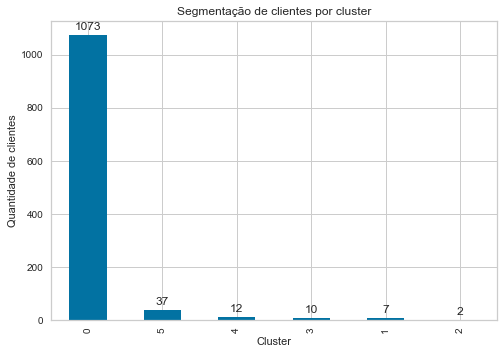

In [23]:
cluster_counts = df4['cluster'].value_counts()

# Plotar um gráfico de barras
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Quantidade de clientes')
plt.title('Segmentação de clientes por cluster')
#plt.show()

#Iterando sobre as barras e adicionando o valor exato acima das mesmas
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center',
                       va='center',
                       size=12,
                       xytext=(0,8),
                       textcoords='offset points')

plt.show()
                    
    

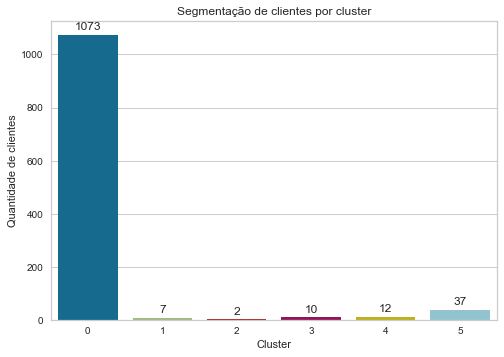

In [24]:
# Criar um gráfico de segmentação
sns.countplot(x='cluster', data=df4)
plt.xlabel('Cluster')
plt.ylabel('Quantidade de clientes')
plt.title('Segmentação de clientes por cluster')

#Iterando sobre as barras e adicionando o valor exato acima das mesmas
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center',
                       va='center',
                       size=12,
                       xytext=(0, 8),
                       textcoords='offset points')

plt.show()
    

In [25]:
# Realizando a Clusterização sem Outliers
df5 = df0.copy()

In [26]:
#Dados estatísticos
df5.describe()

,valor_total,numero_visitas,quantidade_produtos,dias_desde_ultima_compra
count,53170.000000,53170.000000,53170.000000,53170.000000
mean,2246.389487,30.967068,264.899680,159.235415
std,4146.176503,52.303246,496.771878,270.850289
min,0.000000,1.000000,1.000000,2.000000
25%,182.000000,3.000000,18.000000,7.000000
50%,714.000000,10.000000,75.000000,28.000000
75%,2448.000000,36.000000,280.000000,192.000000
max,111717.000000,1572.000000,10059.000000,1521.000000


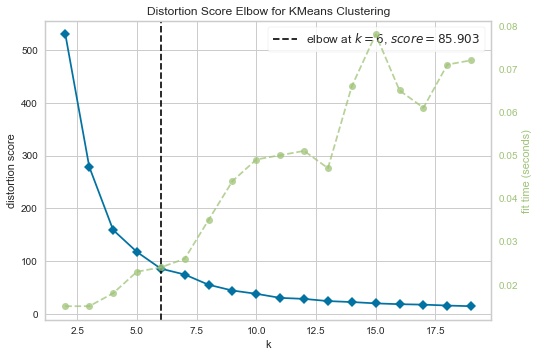

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
#Selecionando as colunas de relevância
X5 = df5[['valor_total','dias_desde_ultima_compra']]

#Normalizando
scaler_5 = MinMaxScaler()
X_scaled_5 = scaler_5.fit_transform(X5)

#Intânciando o modelo
kmeans_5 = KMeans()

#Criando uma visualiação do cotovelo usando o KElbowVisualizer
visualizador_5 = KElbowVisualizer(kmeans_5, k=(2,20))
visualizador_5.fit(X_scaled_5)

#Mostrando a visualização
visualizador_5.show()

In [28]:
df6 = df5.reset_index(drop=True)

Índice de silhueta médio: 0.7262038243314524


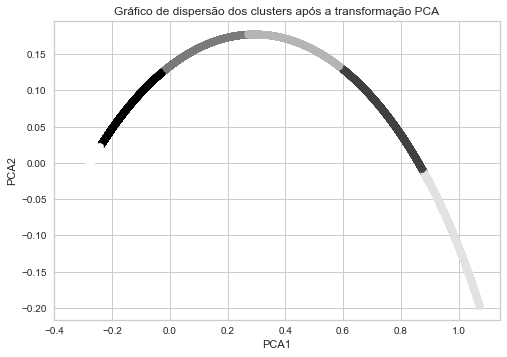

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#Normalizando os dados
normalizador_5 = Normalizer()
X_normalizado_5 = normalizador_5.fit_transform(X5)

#Aplicar a transformação de PCA
pca = PCA(n_components=2)
X_pca_5 = pca.fit_transform(X_normalizado_5)

# Escolher o número de clusters
k = 6

#Realizar o agrupamento com K-means
kmeans_5 = KMeans(n_clusters=k, random_state=42, init='k-means++')
kmeans_5.fit(X_pca_5)

# Adicionar as etiquetas de cluster ao DataFrame original
df6['cluster'] = kmeans_5.labels_

#Avaliar a qualidade dos clusters usando o índice de silhueta
silhouette_avg_5 = silhouette_score(X_pca_5, kmeans_5.labels_)
print('Índice de silhueta médio: {}'.format(silhouette_avg_5))

#Plotando o gráfico de dispersão praa visualizar os clusters
plt.scatter(X_pca_5[:,0], X_pca_5[:,1], c=df6['cluster'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Gráfico de dispersão dos clusters após a transformação PCA')
plt.show()

In [30]:
#Clientes por cluster
cluster_status_5 = df6.groupby('cluster').agg({
    'valor_total'    : ['count', 'mean', 'std', 'min', 'max'],
    'numero_visitas' : ['count', 'mean', 'std', 'min', 'max'],
    'quantidade_produtos' : ['count', 'mean', 'std', 'min', 'max'],
    'dias_desde_ultima_compra' : ['count', 'mean', 'std', 'min', 'max']
})

cluster_status_5.columns = ['_'.join(col).strip() for col in cluster_status_5.columns.values]

cluster_status_5

,valor_total_count,valor_total_mean,valor_total_std,valor_total_min,valor_total_max,numero_visitas_count,numero_visitas_mean,numero_visitas_std,numero_visitas_min,numero_visitas_max,quantidade_produtos_count,quantidade_produtos_mean,quantidade_produtos_std,quantidade_produtos_min,quantidade_produtos_max,dias_desde_ultima_compra_count,dias_desde_ultima_compra_mean,dias_desde_ultima_compra_std,dias_desde_ultima_compra_min,dias_desde_ultima_compra_max
cluster,,,,,,,,,,,,,,,,,,,,
0,31071,3611.263397,4970.851069,27,111717,31071,49.417656,61.701147,1,1572,31071,426.540633,596.031102,1,10059,31071,22.629011,49.554385,2,1042
1,6258,66.705657,54.860047,0,396,6258,1.521732,1.153376,1,16,6258,8.068552,8.436410,1,87,6258,609.391659,356.850961,4,1521
2,3043,283.612225,258.902047,4,1825,3043,4.341768,5.270418,1,44,3043,31.869208,40.632200,1,377,3043,301.323365,266.820935,4,1512
3,3435,425.137991,457.428961,3,3359,3435,6.354294,7.997703,1,92,3435,48.408443,66.490969,1,693,3435,223.662300,234.791141,2,1469
4,3714,170.390953,130.421988,1,939,3714,2.806947,3.083565,1,33,3714,19.173129,21.185633,1,258,3714,392.710824,282.546911,3,1518
5,5649,683.538148,917.812589,7,9785,5649,9.926713,14.152171,1,201,5649,79.077536,126.916294,1,1449,5649,142.703664,186.976960,2,1382


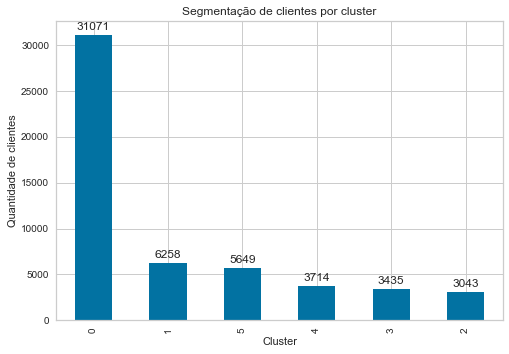

In [31]:
#Plotando
cluster_counts_5 = df6['cluster'].value_counts()

# Plotar um gráfico de barras
cluster_counts_5.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Quantidade de clientes')
plt.title('Segmentação de clientes por cluster')
#plt.show()

#Iterando sobre as barras e adicionando o valor exato acima das mesmas
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center',
                       va='center',
                       size=12,
                       xytext=(0,8),
                       textcoords='offset points')

plt.show()
                    
    

In [32]:
df6

,cod_cliente,valor_total,numero_visitas,quantidade_produtos,dias_desde_ultima_compra,cluster
0,10000,2069,46,214,4,0
1,10001,9110,200,1111,8,0
2,10002,76,2,2,370,1
3,10006,8883,153,1087,350,0
4,10007,9072,119,1289,2,0
...,...,...,...,...,...,...
53165,9992,1867,17,145,51,0
53166,9995,4154,68,661,12,0
53167,9997,5229,74,397,6,0
53168,9998,2767,41,403,3,0


# Exportando para Arquivo

In [33]:
df4.to_csv('clientes_clusterizados_sem_outliers.csv')

In [34]:
#df6.to_csv('clientes_clusterizados_com_outliers.csv')